In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from windrose import WindroseAxes, plot_windrose


In [2]:
df = pd.read_csv(r"../data/allevents/results/storm_classification_wxcodes.csv")
df = df[df['stnNum']==66037]

In [3]:
def plot_windrose_subplots(data, *, direction, var, color=None, **kwargs):
    """wrapper function to create subplots per axis"""
    ax = plt.gca()
    ax = WindroseAxes.from_ax(ax=ax, theta_labels=["E", "NE", "N", "NW", "W", "SW", "S", "SE"])
    #ax.bar(data[direction], data[var])
    plot_windrose(direction_or_df=data[direction], var=data[var], ax=ax, **kwargs)

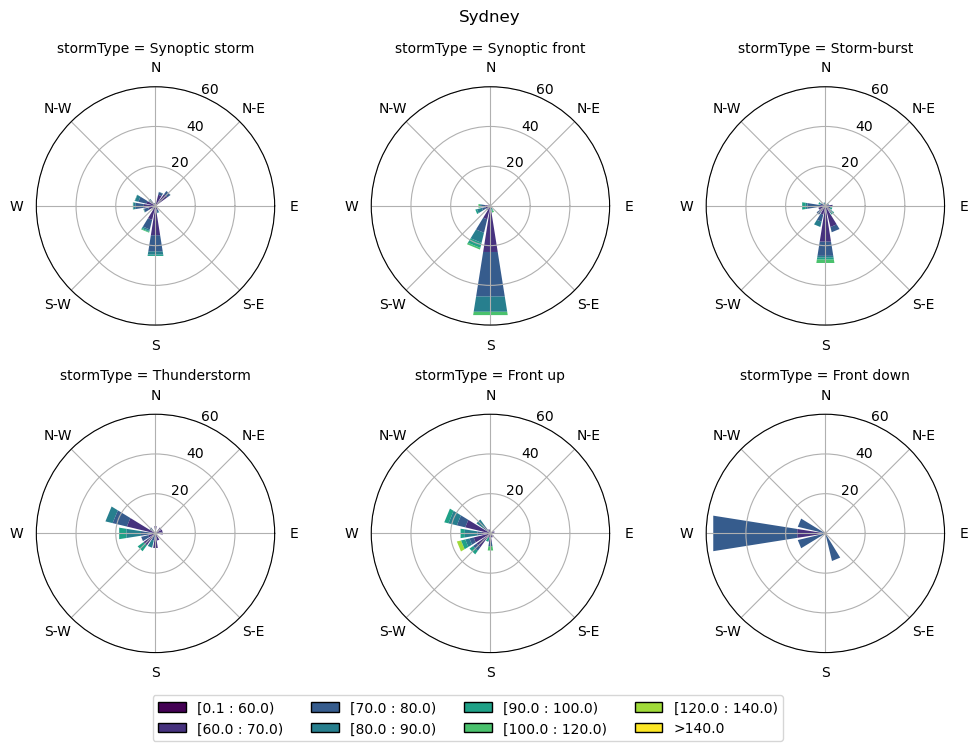

In [4]:
g = sns.FacetGrid(
    data=df,
    # the column name for each level a subplot should be created
    col="stormType",
    # place a maximum of 3 plots per row
    col_wrap=3,
    col_order=['Synoptic storm', 'Synoptic front', 'Storm-burst',
               'Thunderstorm', 'Front up', 'Front down'],
    subplot_kws={"projection": "windrose"},
    sharex=False,
    sharey=False,
    despine=False,
    height=3.5,
)

g.map_dataframe(
    plot_windrose_subplots,
    data=df,
    direction="winddir",
    var="windgust",
    normed=True,
    # manually set bins, so they match for each subplot
    bins=(0.1, 60, 70, 80, 90, 100, 120, 140),
    calm_limit=0.1,
    kind="bar",
)

y_ticks = range(20, 65, 20)
for ax in g.axes:
    ax.set_rgrids(y_ticks, y_ticks)

plt.subplots_adjust(bottom=0.9, left=0.0, right=1.0, top=1.0)
g.axes[-1].legend(bbox_to_anchor=(-1., -0.4), loc='lower center', ncols=4)
g.figure.suptitle("Sydney", x=0.475, ha="right")
g.figure.tight_layout()

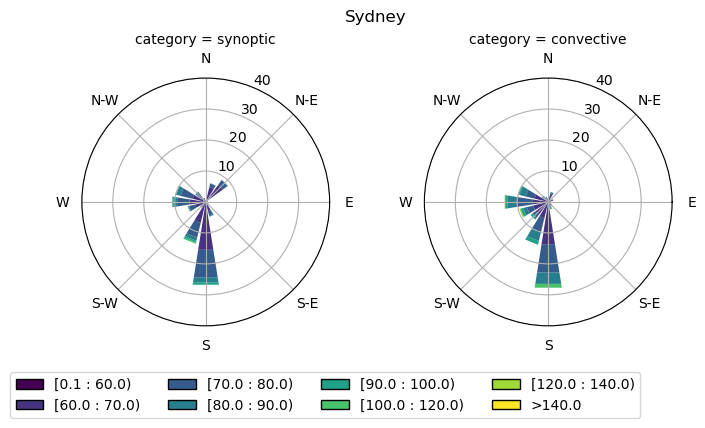

In [5]:
g = sns.FacetGrid(
    data=df,
    # the column name for each level a subplot should be created
    col="category",
    # place a maximum of 3 plots per row
    col_wrap=2,
    subplot_kws={"projection": "windrose"},
    sharex=False,
    sharey=False,
    despine=False,
    height=3.5,
)

g.map_dataframe(
    plot_windrose_subplots,
    data=df,
    direction="winddir",
    var="windgust",
    normed=True,
    # manually set bins, so they match for each subplot
    bins=(0.1, 60, 70, 80, 90, 100, 120, 140),
    calm_limit=0.1,
    kind="bar",
)

y_ticks = range(10, 45, 10)
for ax in g.axes:
    ax.set_rgrids(y_ticks, y_ticks)

g.figure.suptitle("Sydney", va="bottom")
g.axes[-1].legend(bbox_to_anchor=(-0.4, -0.4), loc='lower center', ncols=4)
